# Marketing Analytics
by Kuanchieh Peng

## Problem Statement
I am a marketing data analyst and I've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. I need to analyze datasets to understand this problem and propose data-driven solutions.
## Dataset Overview
The data set ifood_df.csv consists of 2206 customers of XYZ company with data on customer profiles, product preferences, campaign successes/failures, and channel performance.
## Sources
Dataset is ifood_df.csv from https://github.com/nailson/ifood-data-business-analyst-test. I do not own this dataset.
## Brief
- Preprocessing
- EDA
- Statistical Analyses on Campaigns
- CMO Recommendations

In [46]:
df.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Num_Purchases,Total_Accepted_Cmp,AOV
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,32,1,47.781250
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,11,0,1.909091
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,25,0,29.360000


In [50]:
df.insert(0, 'ID', df.index)
df.head(3)

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0


In [51]:
title = 'ifood_df_tableau.csv'
df_cleaned.to_csv(title, index = False)
df = pd.read_csv(title)

## Preprocessing

In [5]:
# for when the notebook is not opened as root
#import sys
#!{sys.executable} -m pip install --user shap

In [13]:
# for preprocessing, EDA
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# for statistical analyses and evaluation
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn import metrics
#import shap

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# for suppressing warnings
import warnings
warnings.simplefilter("ignore")

In [48]:
df = pd.read_csv('ifood_df.csv')
df_cleaned = df.copy()

## Pipeline

In [15]:
class bold:
    start = '\033[1m'
    end   = '\033[0m'
    
def full_info(df):
    # Prints typically useful statistical information about given dataframe.
    print("This dataframe consists of ", df.shape[1], " columns and", df.shape[0], " rows.")
    print("This dataframe consists of ", df.isnull().sum().sum(), " null entires.")
    print("This dataframe consists of ", df[df.duplicated()].shape[0], " duplicate rows.")
    print("")
    print(bold.start, "Notable statistics of numeric features in this dataset:", bold.end)
    print("")
    print(df.describe())
    print("")
    print(bold.start, "Object type of features in this dataset:", bold.end)
    print("")
    df.info()
    
def short_info(df):
    # Prints selected useful statistical information about given dataframe.
    print("This dataframe consists of ", df.shape[1], " columns and", df.shape[0], " rows.")
    print("This dataframe consists of ", df.isnull().sum().sum(), " null entires.")
    print("This dataframe consists of ", df[df.duplicated()].shape[0], " duplicate rows.")
    
def cwd():
    print(os.getcwd())

## Data Cleaning

In [16]:
df.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0


In [17]:
df.shape

(2205, 39)

In [18]:
full_info(df)

This dataframe consists of  39  columns and 2205  rows.
This dataframe consists of  0  null entires.
This dataframe consists of  184  duplicate rows.

 Notable statistics of numeric features in this dataset: 

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.00

#### Annotation on Features
- (Kid)home - number of kids in customer's household
- Recency - number of days since customer's last purchase
- Mnt(Wines) - amount spent on (wine) in the past two years
- Num(Deals)Purchases - number of purchases made with a discount
- Accepted(Cmp3) - 1 if customer accepted offer in third campaign, 0 otherwise
- Response - 1 if customer accepted offer in the last campaign, 0 otherwise
- Complain - 1 if customer had filed one or more complaints in the past two years, 0 otherwise 

#### Assessment Report
- There are 184 duplicate rows.
- There are 0 null entries.
- Feature data types are ideal(being numerical).

#### Dropping Duplicates

In [19]:
df_cleaned = df.drop_duplicates()

In [20]:
df_cleaned[df_cleaned.duplicated()].shape[0]

0

In [21]:
title = 'ifood_df_cleaned.csv'
df_cleaned.to_csv(title, index = False)
df = pd.read_csv(title)

#### Checking Cleaned Dataframe

In [22]:
df.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0


In [23]:
short_info(df)

This dataframe consists of  39  columns and 2021  rows.
This dataframe consists of  0  null entires.
This dataframe consists of  0  duplicate rows.


## EDA

#### Investigaing Outliers
We have gotten nulls and duplicates out of the way, but are there any outliers? Suppose there is, should we do anything about them? If action is needed, how should the outliers be handled?

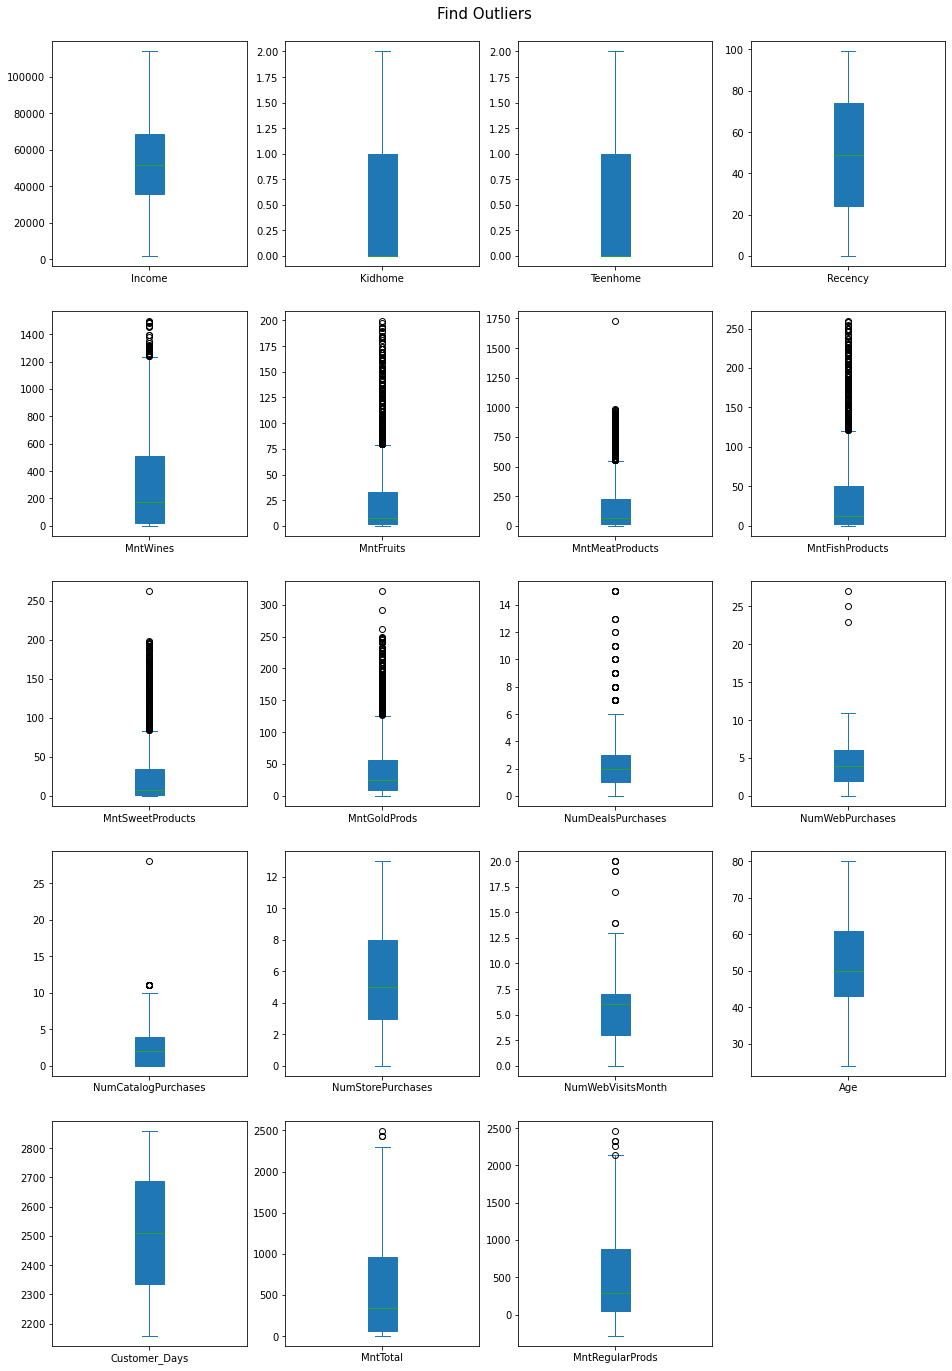

In [24]:
cols_to_drop = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Z_CostContact', 'Z_Revenue', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'AcceptedCmpOverall']
df_for_plot = df.drop(columns = cols_to_drop).select_dtypes(include = np.number)
del cols_to_drop
df_for_plot.plot(subplots = True, layout = (5, 4), kind = 'box', figsize = (16, 24), patch_artist = True)
plt.suptitle('Find Outliers', fontsize = 15, y = 0.9)
plt.savefig('feature_boxplots.png')

There are many features with outliers, but the outliers do seem like they belong because of the features' nature. In other words, the outliers exist not because of probability. Therefore, I am leaving the outliers as they are. If unexplainable outliers appear, I will consider removing them from the feature.

#### Feature Engineering - Manual
We have neither mulitple datasets to joined together nor time series features within the dataframe; therefore, automation such as Featuretools and Tsfresj are not needed here. Below are some variables to create as they would be intuitively useful:
- Total_Num_Purchases
 - The total number of purchases in the past two years, which can be acquired by summing up all 'Num_Purchases'
- Accepted_Cmp_Portion_1 (and 2~5)
 - The portion of campaigns , which can be acquired by summing up all 'AcceptedCmp_'
- AOV
 - The average order volume of each customer, which can be calculated by dividing 'MntTotal' by 'Total_num_purchase' 

In [25]:
df['Total_Num_Purchases'] = df.NumDealsPurchases + df.NumWebPurchases + df.NumCatalogPurchases + df.NumStorePurchases + df.NumWebVisitsMonth
df['Total_Accepted_Cmp'] = df.AcceptedCmp1 + df.AcceptedCmp2 + df.AcceptedCmp2 + df.AcceptedCmp2  + df.AcceptedCmp3 + df.AcceptedCmp4 + df.AcceptedCmp5 + df.Response
df['AOV'] = df.MntTotal / df.Total_Num_Purchases

df.to_csv(title, index = False)
df = pd.read_csv(title)
df.head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Num_Purchases,Total_Accepted_Cmp,AOV
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,32,1,47.781250
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,11,0,1.909091
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,25,0,29.360000


#### Feature Selection - Random Forest
One-hot encoding, splitting data into training and validation set, training a random forest, calculating for errors.
As we have dealt with null entries and the removal of our target variable, we can conduct one-hot encoding with a simple one-liner.

In [26]:
df = pd.get_dummies(df)

X = df.drop(columns=['NumStorePurchases'])
y = df['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3) 

#Create a Random Forest Classifier with 200 trees
rg = RandomForestRegressor(n_estimators = 200, n_jobs = -1)

rg.fit(X_train, y_train)
y_pred=rg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7741762767710049
Mean Squared Error: 1.2701449341021418
Root Mean Squared Error: 1.1270070692334373


Thanks to our random forest model, we get to know feature importance scores.

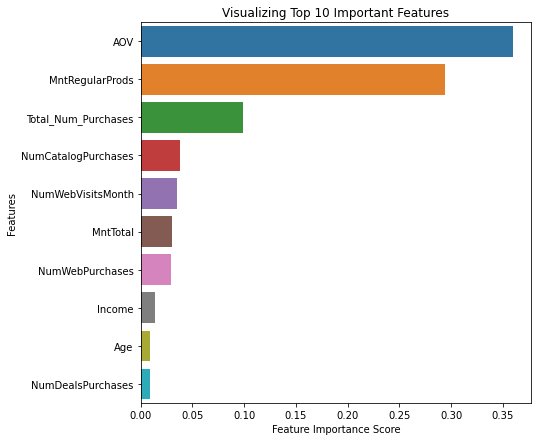

In [27]:
# finding feature importance scores
feature_imp = pd.Series(rg.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sb.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()

#### Shap Values - Calculating and Visualizing

In [28]:
ex = shap.Explainer(rg, X_train)
shap_values = ex(X_test)

plt.title('SHAP summary for NumStorePurchases', size=16)
fig = shap.plots.beeswarm(shap_values, max_display=8)
plt.savefig('shap.png', bbox_inches='tight')
plt.show()

NameError: name 'shap' is not defined

Observations:
- The number of store purchases increases with higher total amount spent, ghiher total purchase amount, higher AOV, and higher amount of wine purchases.
- The number of store purchases decreases higher number of website visits, higher number of purchases through catalog, and higher number of purchases through websites.

#### Feature Selection - Correlation Heatmap
Apart from the knowing the 10 most important features, also use a heatmap to plot correlations between each set of variables to get to know the features even more. Blue indicates a positive correlation while red indicates a negative correlation.
Also take notes of anomalies and patterns.

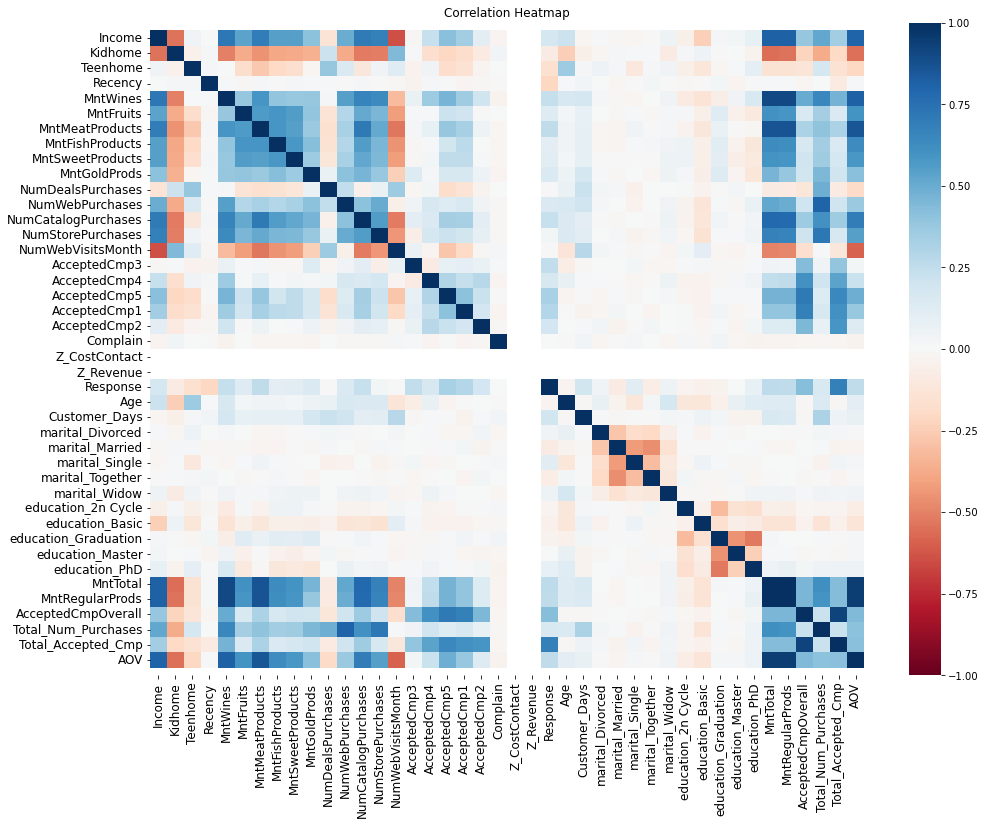

In [29]:
plt.figure(figsize = (16, 12))
s = sb.heatmap(df.corr(),  cmap = 'RdBu', vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('correlation_heatmap.png', bbox_inches = 'tight')
plt.show()

Observations:
- High-income individuals
 - tend to spend more and purchase more times
 - tend to visit the company's website less frequently than other people
 - tend to have fewer number of purchases with a discount
- People having kids at home
 - tend to spend less and purchase fewer times
 - tend to has higher number of purchases
- People who purchased with high AOV
 - tend to buy more wines and meat products
 - tend to make higher number of purchases with a catalog
 - tend to not visit the company's website   

Anomalies:

Intuitively, the more complaints a customer has, the less the customer should spend and the fewer purchases the customer should make. However, the number of complaints in the last two years has nearly no correlation  with the total amount spent in the past two years.

#### Investigating Anomalies
Anomaly: lack of correlation between number of complaints and total amount spent

Text(0.5, 1.0, 'Complain vs. MntTotal')

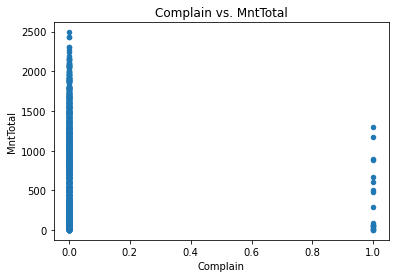

In [30]:
df.plot(x = 'Complain', y = 'MntTotal', kind = 'scatter')
plt.title('Complain vs. MntTotal')

In [31]:
r, p_value = pearsonr(x = df['Complain'], y = df['MntTotal'])
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  -0.030881316598371702
Pearson p-value:  0.1652107099904738


In [32]:
df[df['Complain'] > 0].shape[0]

19

In [33]:
df.shape[0]

2021

After invesgitation, out of the 2021 legit records, there are only 19 customers who complained in the past two years, while we have 2021 customers in total. 

## More EDA

#### NumWebPurchases vs. NumWebVisitsMonth
Intuitively, number of web purchases positively correlates with numbver of web visits. Verify the hypothesis.

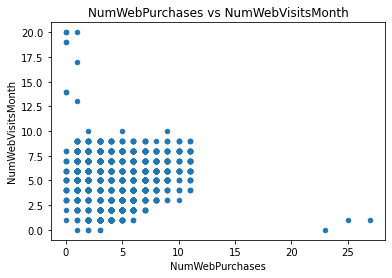

In [34]:
df.plot(x = 'NumWebPurchases', y = 'NumWebVisitsMonth', kind = 'scatter')
plt.title('NumWebPurchases vs NumWebVisitsMonth');

In [35]:
r, p_value = pearsonr(x = df['NumWebPurchases'], y = df['NumWebVisitsMonth'])

print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  -0.056337521173040576
Pearson p-value:  0.0113049556076874


The visualization does not show any correlation between NumWebPurchases and NumWebVisitsMonth.

#### NumStorePurchases & its Potential Factors
Discover or features that are significantly related to the number of store. We can use random forest to predict number of store purchases, then use its feature importance to rank the most correlated features and investigate whether any of them is a factor.

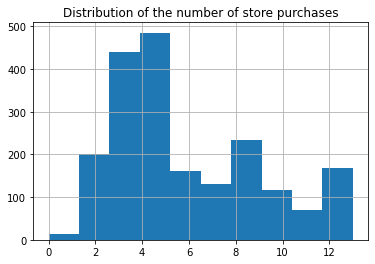

In [36]:
df.NumStorePurchases.hist()
plt.title("Distribution of the number of store purchases");

#### In-store vs. online shoppers
Boxplot the comparison of order volume between in-store or online shoppers. With a significant difference, we can target one of the two legion.

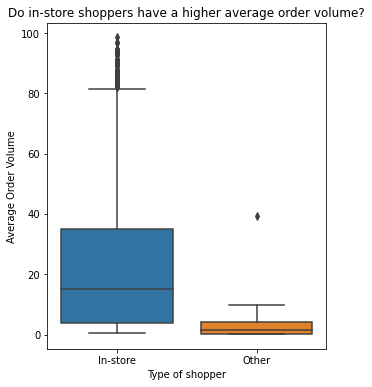

In [37]:
store_shoppers = df[df.NumStorePurchases>0]
store_shoppers = store_shoppers[store_shoppers.AOV <= (store_shoppers.AOV.mean()+3*store_shoppers.AOV.std())]
store_shoppers['Type of shopper'] = "In-store"
other_shoppers = df[df.NumStorePurchases==0]
other_shoppers['Type of shopper'] = "Other"

plt.figure(figsize = (5, 6))
all_shoppers = store_shoppers.append(other_shoppers)
plt.title("Do in-store shoppers have a higher average order volume?")
sb.boxplot(data = all_shoppers, x = 'Type of shopper', y = 'AOV')
plt.ylabel("Average Order Volume")
plt.savefig('AOV.png', bbox_inches='tight')

In-store shoppers have much higher order volumes at every percentile. Consider targetting in-store shoppers or converting online shoppers into in-store shoppers.

#### AOV vs. NumStorePurchases
Scatterplot the relation between average order volumes and number of in-store purchases. There might be something we can do with this set of features.

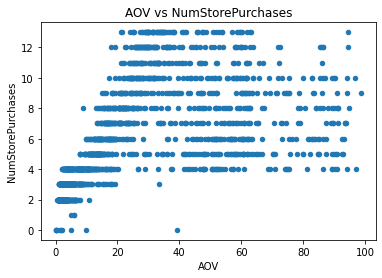

In [38]:
all_shoppers.plot(x='AOV', y='NumStorePurchases', kind='scatter')
plt.title("AOV vs NumStorePurchases");
plt.savefig('AOV vs NumStorePurchases.png', bbox_inches='tight')

In [39]:
all_shoppers.replace([np.inf, -np.inf], 0, inplace = True)
r, p_value = pearsonr(x=all_shoppers['AOV'], y = all_shoppers['NumStorePurchases'])

print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  0.5800098978673883
Pearson p-value:  1.31490738085479e-180


#### MntGoldProds vs. NumStorePurchases
Scatterplot the relation between amount spent on gold the past two years and number of in-store purchases. It is said that people who buy gold are more conservative therefore might not be responding much to our campaigns. Justify or refute the statement using an appropriate statistical test.

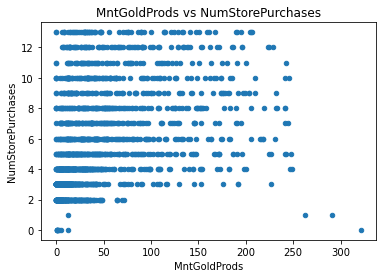

In [40]:
df.plot(x='MntGoldProds', y='NumStorePurchases', kind='scatter')
plt.title("MntGoldProds vs NumStorePurchases");
plt.savefig('MntGoldProds vs NumStorePurchases.png', bbox_inches='tight')

In [41]:
r, p_value  =  pearsonr(x = df['MntGoldProds'], y = df['NumStorePurchases'])

print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  0.38219761966741295
Pearson p-value:  2.716365397245341e-71


#### 2 Gold Purchases Groups

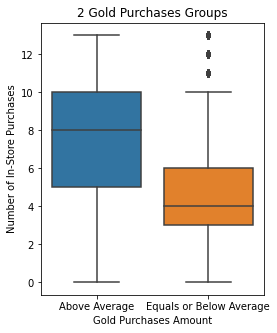

In [42]:
gold_above_avg =  df[df.MntGoldProds > df.MntGoldProds.mean()]
gold_above_avg['Gold Purchases Amount'] = "Above Average"
gold_equ_or_below_avg =  df[df.MntGoldProds <= df.MntGoldProds.mean()]
gold_equ_or_below_avg['Gold Purchases Amount'] = "Equals or Below Average"

plt.figure(figsize = (4, 5))
df_gold = gold_above_avg.append(gold_equ_or_below_avg)
plt.title("2 Gold Purchases Groups")
sb.boxplot(data = df_gold, x = 'Gold Purchases Amount', y = 'NumStorePurchases')
plt.ylabel("Number of In-Store Purchases");

#### Married PhD vs. the Rest

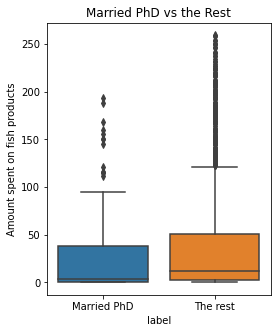

In [43]:
married_phd = df[(df.education_PhD == 1) & (df.marital_Married == 1)]
married_phd['label'] = "Married PhD"
the_rest = df[(df.education_PhD != 1) | (df.marital_Married != 1)]
the_rest['label'] = "The rest"

df_combined = married_phd.append(the_rest)
plt.figure(figsize = (4, 5))
plt.title("Married PhD vs the Rest")
sb.boxplot(data = df_combined, x = 'label', y = 'MntFishProducts')
plt.ylabel("Amount spent on fish products");
plt.savefig('Married PhD vs the Rest.png', bbox_inches='tight')

#### Which Marketing Campaigns Are Unsuccessful?  

Judge the success of campaigns based on the number of offers accepted for each campaign. Assuming the numbers of total offers from each campaign are equal, the larger the number of accepted offers, the more successful the campaign is  

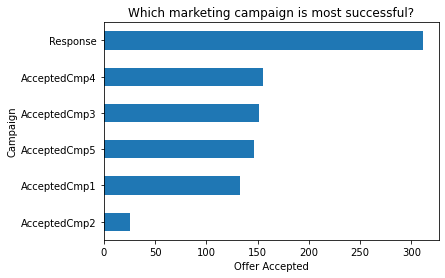

In [44]:
df[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum().sort_values().plot.barh()
plt.title("Which marketing campaign is most successful?")
plt.xlabel("Offer Accepted");
plt.ylabel("Campaign")
plt.savefig('Which marketing campaign is most successful.png', bbox_inches='tight')

The last campaign has by far the best effect while campaign 2 has by far the worst.

#### Which Marketing Channels Are Underperforming?

Text(0, 0.5, 'Channel')

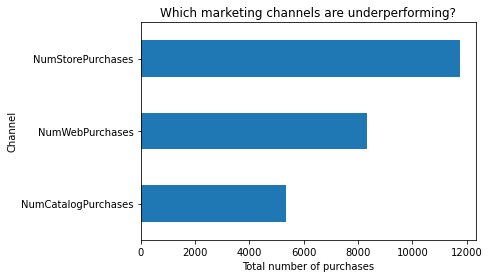

In [45]:
df[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum().sort_values().plot.barh()
plt.title("Which marketing channels are underperforming?")
plt.xlabel("Total number of purchases")
plt.ylabel("Channel")

## Further Investigations

Now we know how successful each campaign is, investigate the differences in customer characteristics and spending behaviors between the last campaign(the most successful one), the most unsuccesful campaign, and the rest.
- Characteristics - 'Income', 'Minorhome', 'Country', 'Join_month', 'Join_weekday'
- Spending behaviors:
    - Products - 'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts'
    - Channels - 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
    - Totals - 'Total_Mnt', 'Total_num_purchase', 'AOV'

## Recommendations for the CMO

#### Summary
- The last 